In [ ]:
#EXP_1
import tensorflow as tf
print(tf.__version__)
print(tf.reduce_sum(tf.random.normal([1000,1000])))
from tensorflow import keras
from keras.datasets import mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test: ' + str(train_x.shape))
print('Y_test: ' + str(train_y.shape))
from matplotlib import pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.show()

2.14.0
tf.Tensor(1169.1118, shape=(), dtype=float32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6627 - accuracy: 0.8345 - val_loss: 0.3670 - val_accuracy: 0.8968
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3424 - accuracy: 0.9042 - val_loss: 0.3030 - val_accuracy: 0

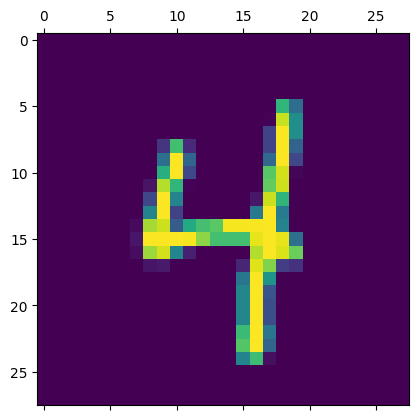

In [ ]:
#EXP_2
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.matshow(x_train[0]) #use to visualised sample img,(grayscale img)
x_train = x_train/255 # to normalize a pixel value so fallin (0,1)
x_test = x_test/255
x_train[0]
# create a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('confusion matrix of the test set:\n',confusion_matrix)

In [ ]:
#EXP_3

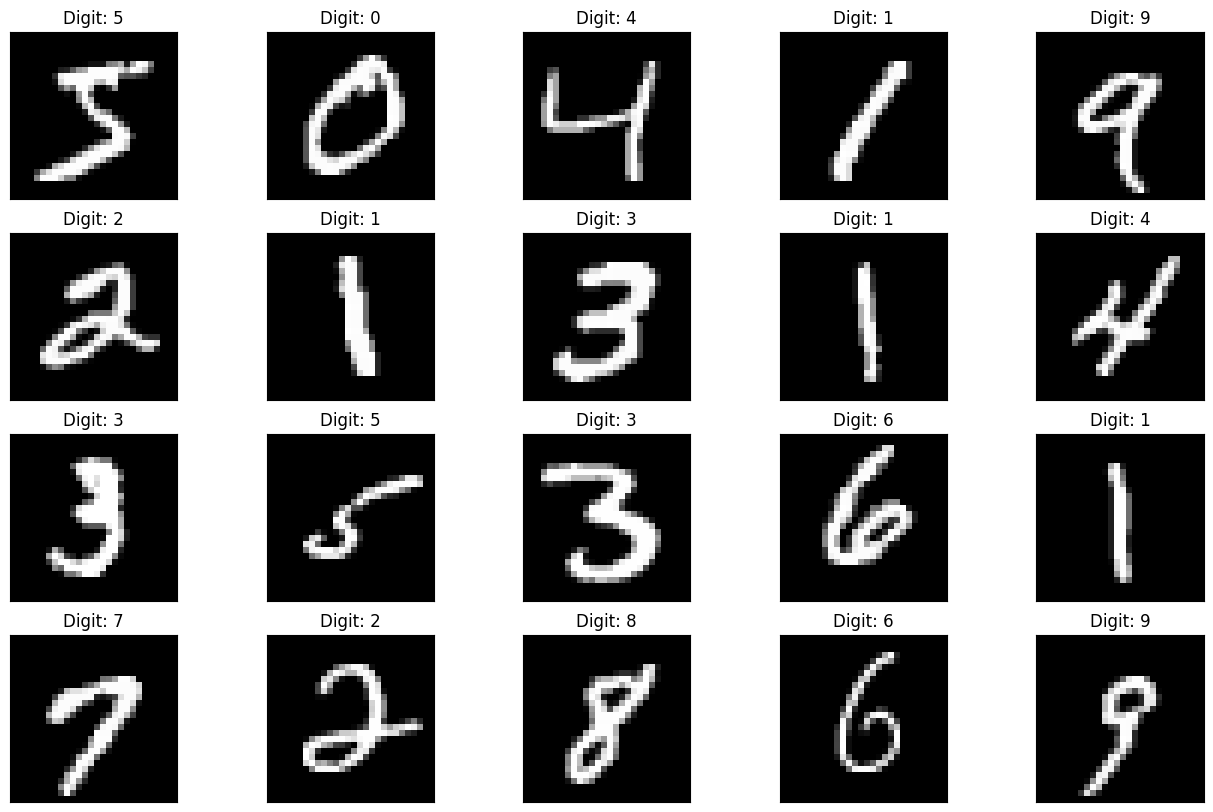

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

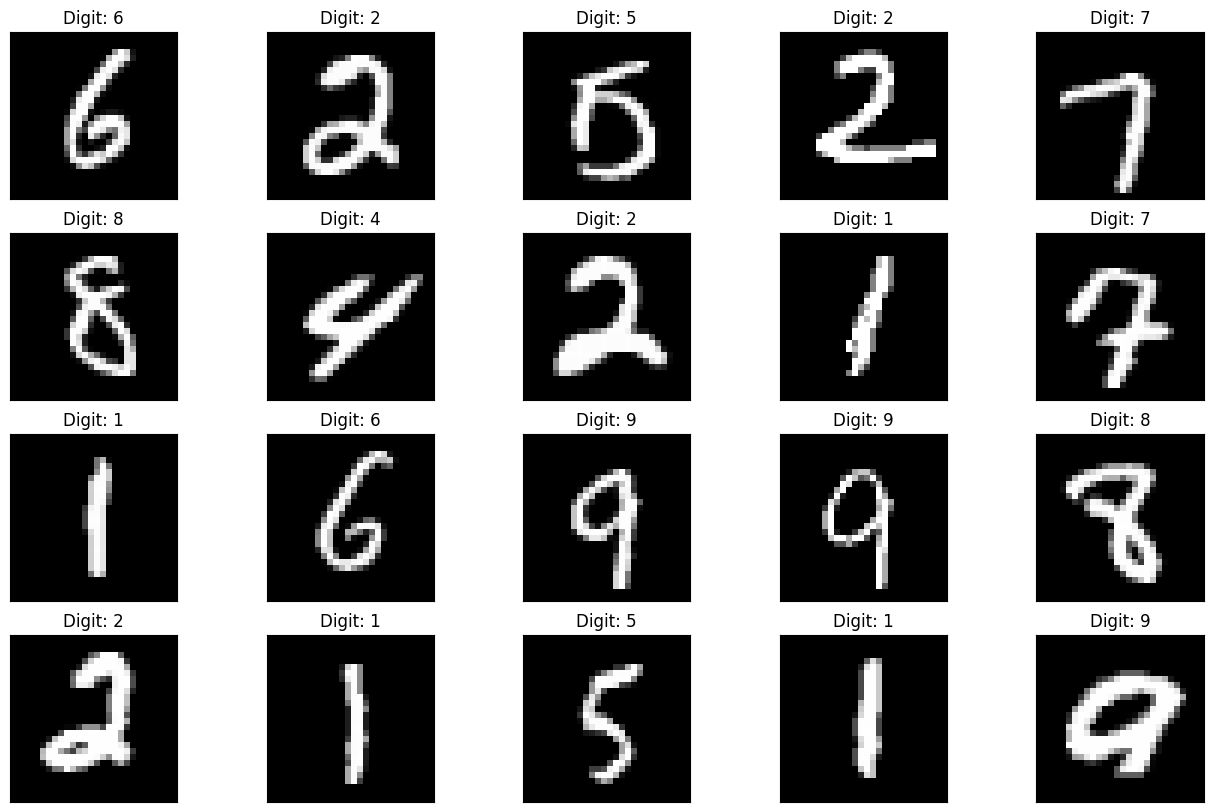

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.987
Test loss: 0.042706504464149475
Test accuracy: 0.9869999885559082


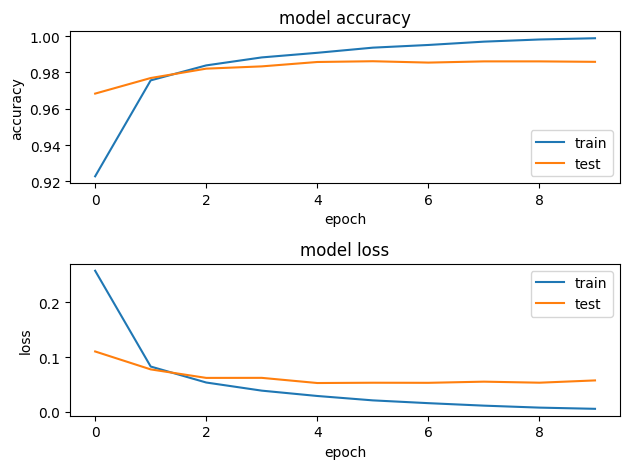

Saved model to disk


In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

model_log = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Add validation split here

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()


predictions = np.argmax(model.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(y_test, predictions))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])#Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

import os
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2, 1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])
model_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_digit.h5")
print("Saved model to disk")









In [ ]:
#EXP_4
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]
dataset = pd.read_csv("creditcard.csv")

print("Any nulls in the dataset ", dataset.isnull().values.any())
print('---')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values", dataset.Class.unique())
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts (dataset ['Class'], sort = True))

count_classes = pd.value_counts(dataset['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset['Class'].unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

import matplotlib.pyplot as plt
import numpy as np

normal_dataset = dataset[dataset['Class'] == 0]
fraud_dataset = dataset[dataset['Class'] == 1]

# Specify bin edges using np.linspace
bins = np.linspace(200, 2500, 100)

with np.errstate(divide='ignore', invalid='ignore'):
    plt.hist(normal_dataset['Amount'], bins, alpha=1, density=True, label='Normal')
    plt.hist(fraud_dataset['Amount'], bins, alpha=0.5, density=True, label='Fraud')

plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions")

plt.show()
sc = StandardScaler()
dataset ['Time'] = sc.fit_transform(dataset [ 'Time'].values.reshape(-1, 1))
dataset ['Amount'] = sc.fit_transform(dataset ['Amount'].values .reshape(-1, 1))

import numpy as np
from sklearn.model_selection import train_test_split
raw_data = dataset.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=2021)



min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data- min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=", len(fraud_train_data))
print(" No. of records in Normal Train data=",len (normal_train_data))
print(" No. of records in Fraud Test Data=", len(fraud_test_data))
print(" No. of records in Normal Test data=",len (normal_test_data))

nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2)
hidden_dim_2=4
learning_rate = 1e-7


input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
autoencoder = tf.keras.Model(inputs=input_layer ,outputs=decoder)
autoencoder.summary()

cp =tf.keras.callbacks. ModelCheckpoint(filepath="autoencoder_fraud.h5", mode='min', monitor = 'val_loss', verbose=2, save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', min_delta=0.0001, patience=10, verbose=1,mode='min', restore_best_weights=True)


autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')


cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5", mode= 'min', monitor="val_loss",  verbose = 2, save_best_only = 'True')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min', restore_best_weights='True')



history = autoencoder.fit(
    normal_train_data,
    normal_train_data,
    epochs=nb_epoch,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(test_data, test_data),
    verbose=1,
    callbacks=[cp, early_stop]
).history


plt.plot(history['loss'], linewidth=2, label = 'Train')
plt.plot(history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.title('Model loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()



test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class' : test_labels})


threshold_fixed = 50
groups = error_df.groupby('True_class')

# Create the plot
fix, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index,
            group.Reconstruction_error,
            marker='o',
            ms=3.5,
            linestyle='',
            label="Fraud"
            if name == 1
            else "normal")

# Plot the threshold line outside the loop
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

# Add legend and labels
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.xlabel("Reconstruction_error")
plt.ylabel("Data point index")

# Show the plot
plt.show()




FileNotFoundError: ignored

In [ ]:
#EXP_5

In [ ]:
def Psat(self, T):
    pop= self.getPborder(T)
    boolean=int(pop[0])

    P1=pop[1]
    P2=pop[2]
    if boolean:
        Pmin = float(min([P1, P2]))
        Pmax = float(max([P1, P2]))
        Tr=T/self.typeMolecule.Tc
        w=0.5*(1+scipy.tanh((10**5)*(Tr-0.6)))
        fi1=0.5*(1-scipy.tanh(8*((Tr**0.4)-1)))
        fi2=0.460*scipy.sqrt(1-(Tr-0.566)**2/(0.434**2)+0.494)

        guess = Pmin+(Pmax-Pmin)*((1-w**2)*fi1+(w**2)*fi2)
        solution = scipy.optimize.newton(funcPsat,guess, args=(T,self))

In [ ]:
import numpy as np
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
#from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import gensim
data=open('corona.txt','r')
corona_data = [text for text in data if text.count(' ') >= 2]
vectorize = Tokenizer()
vectorize.fit_on_texts(corona_data)
corona_data = vectorize.texts_to_sequences(corona_data)
total_vocab = sum(len(s) for s in corona_data)
word_count = len(vectorize.word_index) + 1
window_size = 2

In [ ]:
import tensorflow as tf
def cbow_model(data, window_size, total_vocab):
  total_length = window_size*2
  for text in data:
    text_len = len(text)
    for idx, word in enumerate(text):
      context_word = []
      target = []
      begin = idx - window_size
      end = idx + window_size + 1
      context_word.append([text[i] for i in range(begin, end) if i != idx])
      target.append(word)
      contextual = sequence.pad_sequences(context_word, total_length)
      final_target = tf.keras.utils.to_categorical(target, total_vocab)
      yield(contextual, final_target)


In [ ]:
model = Sequential()
total_length = window_size*2
model.add(Embedding(input_dim=total_vocab, output_dim=100, input_length=total_length))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(100,)))
model.add(Dense(total_vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
for i in range(10):
  cost = 0
  for x, y in cbow_model(data, window_size, total_vocab):
    cost += model.train_on_batch(contextual, final_target)
  print(i, cost)


0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


In [ ]:
dimensions=100
vect_file = open('vectors.txt' ,'w')
vect_file.write('{} {}\n'.format(total_vocab,dimensions))
#Next, we will access the weights of the trained model and write it t
weights = model.get_weights()[0]
for text, i in vectorize.word_index.items():
  final_vec = ' '.join(map(str, list(weights[i, :])))
  vect_file.write('{} {}\n'.format(text, final_vec))
vect_file.close()

In [ ]:
#EXP-6
